# Playground Analysis
*Kiana Kazemi*

Our goal is to find neighbourhood with highest kid to number of playgrounds ratio. This ensures very busy parks and highlights the lack of playgrounds within those neighborhoods.

First, we will load our data. Due to the size of this dataset and some formatting that was interfering with the code, unnessecary rows were deleted. The edited csv was then named "playgrounds":

In [1]:
# import + load pandas, matplot, and geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
%matplotlib inline

# load data for playgrounds
playgrounds = pd.read_csv("Playgrounds-Edited.csv")

Now, we will look at the basic statistics:

In [2]:
playgrounds['name'].value_counts()

Able Long Playground             1
North Ave. Playground            1
Robert E. WIlliams Playground    1
Riverview Playground             1
Rhododendron Playground          1
                                ..
Farmhouse Playground             1
Eric Guy Kelly Playground        1
Esplen Playground                1
Enright Playground               1
Spring Garden Ave Playground     1
Name: name, Length: 125, dtype: int64

In [3]:
playgrounds['neighborhood'].value_counts()

Squirrel Hill South    8
Beechview              5
South Side Slopes      5
Highland Park          4
Sheraden               4
                      ..
Esplen                 1
Fairywood              1
Regent Square          1
Allentown              1
East Allegheny         1
Name: neighborhood, Length: 68, dtype: int64

We find there are 125 playgrounds and 68 neighborhoods in this dataset
Our goal is to now find the number of playgrounds within each neighborhood:

In [4]:
#create a new dataframe that finds the number of playgrounds per neighbourhood
playfreq = playgrounds.groupby('neighborhood')['name'].nunique().reset_index(name = 'playgrounds')

#create a descending list based on the number of playgrounds per neighborhood
playfreq.sort_values(by = 'playgrounds', ascending = False)

,neighborhood,playgrounds
56,Squirrel Hill South,8
4,Beechview,5
52,South Side Slopes,5
0,Allegheny Center,4
5,Beltzhoover,4
...,...,...
41,New Homestead,1
42,Oakwood,1
43,Perry North,1
44,Perry South,1


Now let's take a quick look at the top 10 neighborhoods with the most playgrounds:

In [5]:
playfreq.sort_values(by = 'playgrounds', ascending = False).head(10)

,neighborhood,playgrounds
56,Squirrel Hill South,8
4,Beechview,5
52,South Side Slopes,5
0,Allegheny Center,4
5,Beltzhoover,4
29,Highland Park,4
49,Sheraden,4
40,Mount Washington,3
21,Elliott,3
20,East Liberty,3


While we have now easily found the number of playgrounds per neighborhood and which neighborhoods have the most, this won't provide us with the strongest evidence. What would help further is finding the ratio of kids per playground, to understand which playgrounds would most likely be overcrowded.

To do so, we need to import a second dataset with the number of kids per playground. This data was not readily available in csv format, so I had to create and enter the data into my own data file. 

In [6]:
# load data for under 18 population 
children = pd.read_csv("Children-Population.csv")

Here is a quick look at our data, looking at the neighborhoods with the highest population of children:

In [7]:
children.sort_values(by = 'under18', ascending = False).head(10)

,id,neighborhood,under18
12,13,Brookline,2540
14,15,Squirrel Hill South,2333
45,46,Carrick,2153
66,67,Squirrel Hill North,1569
50,51,Sheraden,1468
32,33,Highland Park,1332
0,1,Beechview,1314
11,12,Brighton Heights,1298
8,9,Homewood North,1151
65,66,Point Breeze North,1133


Next, we need to work on finding the ratios. We will do so by creating a new dataframe and dividing the values of the "under18" column in the "children" dataframe by the "playgrounds" column in the "playfreq" dataframe:

In [8]:
#create merged df
merged = pd.merge(left=playfreq, right=children, left_on='neighborhood', right_on='neighborhood')

#drop the id column from the children df for ease of reading
merged.drop('id', inplace=True, axis=1)

merged.head(10)

,neighborhood,playgrounds,under18
0,Allegheny Center,4,85
1,Allentown,1,754
2,Banksville,1,401
3,Bedford Dwellings,1,405
4,Beechview,5,1314
5,Beltzhoover,4,207
6,Bloomfield,2,757
7,Bluff,1,120
8,Bon Air,1,177
9,Brighton Heights,2,1298


Now that we have all the values in the same dataframe and associated with the same neighborhoods, we can find the ratios:

In [9]:
merged['ratios'] = merged['under18'].astype(str) + ":" + merged['playgrounds'].astype(str)
merged.head(10)

,neighborhood,playgrounds,under18,ratios
0,Allegheny Center,4,85,85:4
1,Allentown,1,754,754:1
2,Banksville,1,401,401:1
3,Bedford Dwellings,1,405,405:1
4,Beechview,5,1314,1314:5
5,Beltzhoover,4,207,207:4
6,Bloomfield,2,757,757:2
7,Bluff,1,120,120:1
8,Bon Air,1,177,177:1
9,Brighton Heights,2,1298,1298:2


And now we can take a look at the simplified ratios:

In [10]:
merged['simplified'] = merged['under18']/merged['playgrounds']
merged.head(10)

,neighborhood,playgrounds,under18,ratios,simplified
0,Allegheny Center,4,85,85:4,21.25
1,Allentown,1,754,754:1,754.00
2,Banksville,1,401,401:1,401.00
3,Bedford Dwellings,1,405,405:1,405.00
4,Beechview,5,1314,1314:5,262.80
5,Beltzhoover,4,207,207:4,51.75
6,Bloomfield,2,757,757:2,378.50
7,Bluff,1,120,120:1,120.00
8,Bon Air,1,177,177:1,177.00
9,Brighton Heights,2,1298,1298:2,649.00


And finally, let's find the top 20 neighborhoods with the worst (greatest) simplified ratios:

In [45]:
merged_d = merged.sort_values(by = 'simplified', ascending = False)
merged_d.head(20)

,neighborhood,playgrounds,under18,ratios,simplified
55,Squirrel Hill North,1,1569,1569:1,1569.000000
10,Brookline,2,2540,2540:2,1270.000000
30,Homewood North,1,1151,1151:1,1151.000000
45,Point Breeze North,1,1133,1133:1,1133.000000
44,Perry South,1,902,902:1,902.000000
48,Shadyside,1,848,848:1,848.000000
57,Stanton Heights,1,831,831:1,831.000000
1,Allentown,1,754,754:1,754.000000
41,New Homestead,1,750,750:1,750.000000
11,Carrick,3,2153,2153:3,717.666667


To better visualize this, we can look at the top 20 most overcrowded neighborhoods on a scatterplot:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

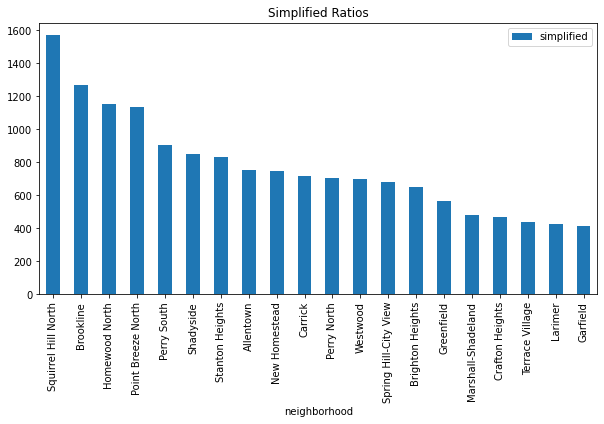

In [46]:
merged_d.head(20).plot(kind = "bar", 
                       x = "neighborhood", 
                       y = "simplified",
                       title = "Simplified Ratios",
                       figsize=(10,5))
plt.xticks(rotation = 90) #to ensure labels are easy to read

However, it might be helpful to also visualize this on a map, with high ratios indicated by colors.

First, let's create a map of Pittsburgh neighborhoods:

In [31]:
#first, let's create the base map
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

Now, we can merge our data with the base map:

In [42]:
# merge neighborhoods df with simplified ratios df
ratio_map = neighborhoods.merge(merged, how='left', left_on='hood', right_on='neighborhood')

And finally, we can put it all together in a chloropleth map:

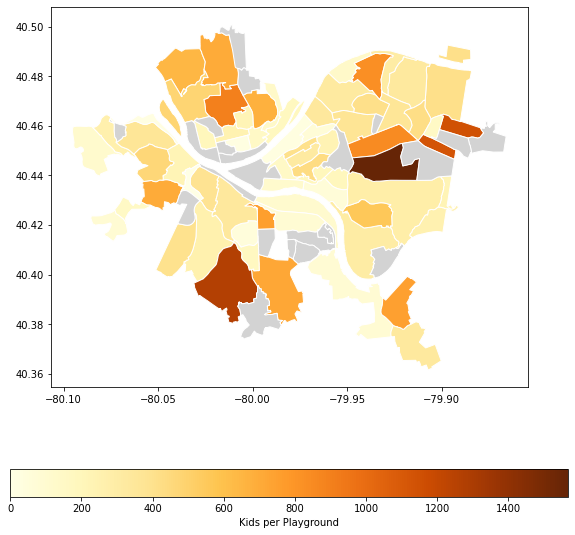

In [44]:
#create a chloropleth map
ratio_map.plot(column='simplified',
               cmap='YlOrBr',
               edgecolor="white",
               legend=True,
               legend_kwds={'label': "Kids per Playground", 'orientation': "horizontal"},
               figsize=(10, 10),
               missing_kwds={"color": "lightgrey"})

This map further highlights the vast difference betweens neighborhoods when it comes to their ratio of kids to playgrounds. Some neighborhoods may be missing data in the map, and that is due to naming differences in neighborhoods. That's why using our bar charts are the best method.

### Conclusion of the playground analysis
Let's take a look back at our dataframe with descending simplified ratio values:

In [47]:
merged_d.head(10)

,neighborhood,playgrounds,under18,ratios,simplified
55,Squirrel Hill North,1,1569,1569:1,1569.000000
10,Brookline,2,2540,2540:2,1270.000000
30,Homewood North,1,1151,1151:1,1151.000000
45,Point Breeze North,1,1133,1133:1,1133.000000
44,Perry South,1,902,902:1,902.000000
48,Shadyside,1,848,848:1,848.000000
57,Stanton Heights,1,831,831:1,831.000000
1,Allentown,1,754,754:1,754.000000
41,New Homestead,1,750,750:1,750.000000
11,Carrick,3,2153,2153:3,717.666667


Here we can conclude that the following Neighborhoods have the most overcrowded playgronds:
1. Squirrel Hill North
2. Brookline
3. Homewood North
4. Point Breeze North
5. Perry South
6. Shadyside
7. Stanton Heights
8. Allentown
9. New Homestead
10. Carrick